In [1]:
from eight_puzzle_solver import EightPuzzleSolver
from state import HEURISTIC
from matplotlib import pyplot as plt
from collections import defaultdict

In [2]:
eight_puzzle_solver = EightPuzzleSolver(no_print=True)

In [3]:
solvable_solutions = {
    "h1": defaultdict(list),
    "h2": defaultdict(list),
    "beam": defaultdict(list)
}
h1_generated, h2_generated = [], []
h1_moves, h2_moves, beam_moves = [], [], []
h1_solvable, h2_solvable, beam_solvable = [], [], []

moves = range(5, 501, 5)
max_nodes = [10 ** (i + 2) for i in range(5)]

for n in moves:
  eight_puzzle_solver.max_nodes = None
  eight_puzzle_solver.randomize_state(n)
  
  h1_res = eight_puzzle_solver.solve_a_star(heuristic=HEURISTIC.H1)
  h1_generated.append(h1_res["generated"])
  h1_moves.append(h1_res["moves"])
  h1_solvable.append(h1_res["moves"] > 0)
  
  h2_res = eight_puzzle_solver.solve_a_star(heuristic=HEURISTIC.H2)
  h2_generated.append(h2_res["generated"])
  h2_moves.append(h2_res["moves"])
  h2_solvable.append(h2_res["moves"] > 0)
  
  beam_res = eight_puzzle_solver.solve_beam(5)
  beam_moves.append(beam_res["moves"])
  beam_solvable.append(beam_res["moves"] > 0)
  
  for mn in max_nodes:
    eight_puzzle_solver.max_nodes = mn

    h1_res = eight_puzzle_solver.solve_a_star(heuristic=HEURISTIC.H1)
    solvable_solutions["h1"][mn].append(h1_res["moves"] > 0)

    h2_res = eight_puzzle_solver.solve_a_star(heuristic=HEURISTIC.H2)
    solvable_solutions["h2"][mn].append(h2_res["moves"] > 0)

    beam_res = eight_puzzle_solver.solve_beam(5)
    solvable_solutions["beam"][mn].append(beam_res["moves"] > 0)


{'h1': defaultdict(<class 'list'>, {100: 0.34, 1000: 0.56, 10000: 0.82, 100000: 0.98, 1000000: 0.98}), 'h2': defaultdict(<class 'list'>, {100: 0.48, 1000: 0.89, 10000: 0.98, 100000: 0.98, 1000000: 0.98}), 'beam': defaultdict(<class 'list'>, {100: 0.39, 1000: 0.98, 10000: 0.98, 100000: 0.98, 1000000: 0.98})}


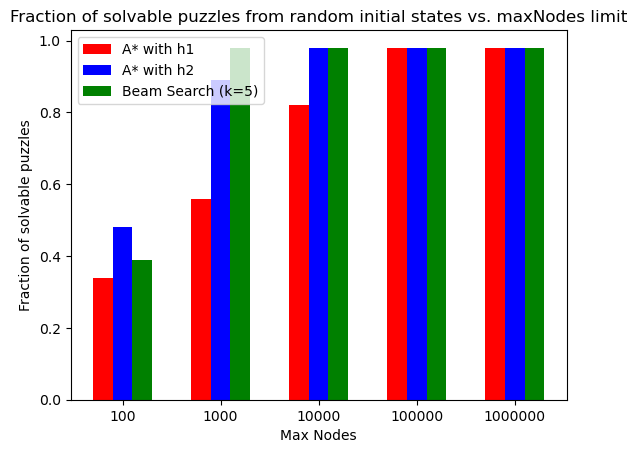

In [4]:
# How does fraction of solvable puzzles from random initial states vary with the maxNodes limit?
    
for key in solvable_solutions.keys():
  for mn in solvable_solutions[key].keys():
    solvable_solutions[key][mn] = round(
        solvable_solutions[key][mn].count(True) / len(solvable_solutions[key][mn]), 2)

x = [1, 2, 3, 4, 5]
y1 = solvable_solutions["h1"].values()
y2 = solvable_solutions["h2"].values()
y3 = solvable_solutions["beam"].values()
width = 0.2

plt.figure()
plt.bar([i - width for i in x], y1, width, color="red")
plt.bar(x, y2, width, color="blue")
plt.bar([i + width for i in x], y3, width, color="green")
plt.xticks(x, max_nodes)
plt.xlabel("Max Nodes")
plt.ylabel("Fraction of solvable puzzles")
plt.legend(["A* with h1", "A* with h2", "Beam Search (k=5)"])
plt.title("Fraction of solvable puzzles from random initial states vs. maxNodes limit")

print(solvable_solutions)

Average number of generated nodes for heuristic 1:  11508
Average number of generated nodes for heuristic 2:  937


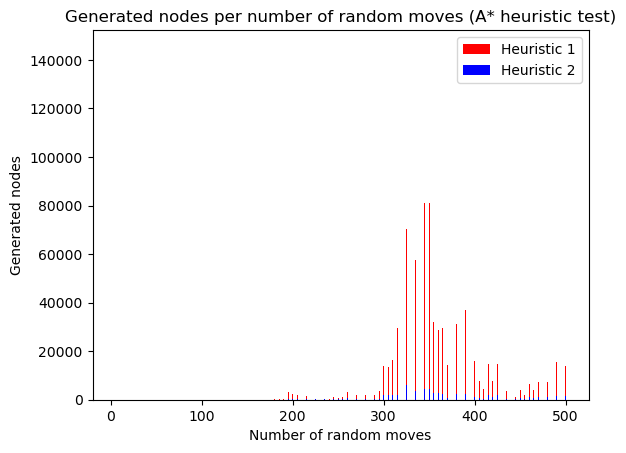

In [5]:
# For A* search, which heuristic is better, i.e., generates lower number of nodes?

plt.figure()
plt.bar(moves, h1_generated, color='r', label='Heuristic 1')
plt.bar(moves, h2_generated, color='b', label='Heuristic 2')
plt.legend()
plt.xlabel('Number of random moves')
plt.ylabel('Generated nodes')
plt.title('Generated nodes per number of random moves (A* heuristic test)')

print("Average number of generated nodes for heuristic 1: ",
      round(sum(h1_generated) / len(h1_generated)))
print("Average number of generated nodes for heuristic 2: ",
      round(sum(h2_generated) / len(h2_generated)))


Average number of moves for heuristic 1:  14
Average number of moves for heuristic 2:  14
Average number of moves for beam search:  39


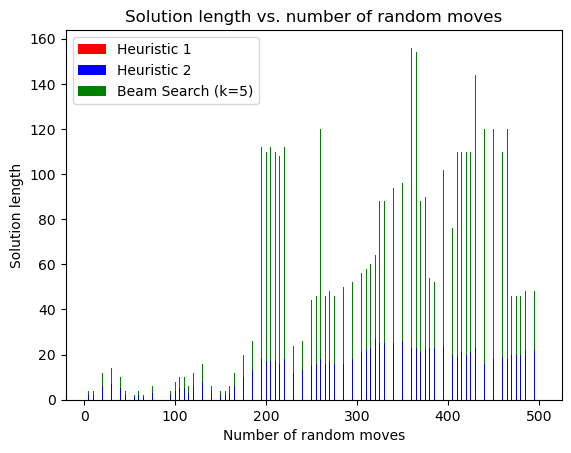

In [6]:
# How does the solution length (number of moves needed to reach the goal state) vary across the three search methods?
    
plt.figure()
plt.bar(moves, h1_moves, color='r', label='Heuristic 1')
plt.bar(moves, h2_moves, color='b', label='Heuristic 2')
plt.bar(moves, beam_moves, color='g',
        label='Beam Search (k=5)', bottom=h2_moves)
plt.legend()
plt.xlabel("Number of random moves")
plt.ylabel("Solution length")
plt.title("Solution length vs. number of random moves")

print("Average number of moves for heuristic 1: ",
      round(sum(h1_moves) / len(h1_moves)))
print("Average number of moves for heuristic 2: ",
      round(sum(h2_moves) / len(h2_moves)))
print("Average number of moves for beam search: ",
      round(sum(beam_moves) / len(beam_moves)))


Fraction of solvable puzzles for heuristic 1:  0.98
Fraction of solvable puzzles for heuristic 2:  0.98
Fraction of solvable puzzles for beam search:  0.98


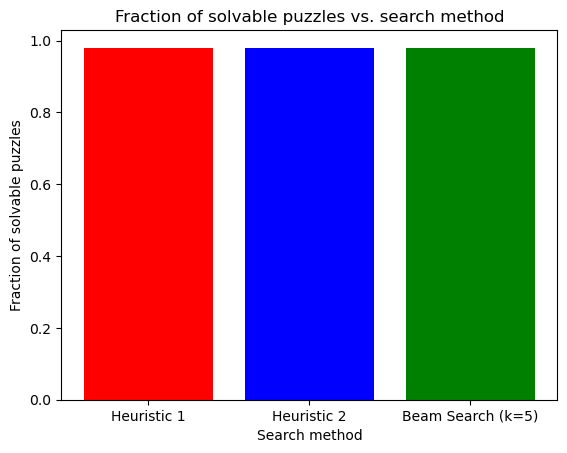

In [7]:
# For each of the three search methods, what fraction of your generated problems were solvable?
    
h1_solvable = round(sum(h1_solvable) / len(h1_solvable), 2)
h2_solvable = round(sum(h2_solvable) / len(h2_solvable), 2)
beam_solvable = round(sum(beam_solvable) / len(beam_solvable), 2)

plt.figure()
plt.bar([1, 2, 3], [h1_solvable, h2_solvable,
        beam_solvable], color=['r', 'b', 'g'])
plt.xticks([1, 2, 3], ["Heuristic 1", "Heuristic 2", "Beam Search (k=5)"])
plt.xlabel("Search method")
plt.ylabel("Fraction of solvable puzzles")
plt.title("Fraction of solvable puzzles vs. search method")

print("Fraction of solvable puzzles for heuristic 1: ", h1_solvable)
print("Fraction of solvable puzzles for heuristic 2: ", h2_solvable)
print("Fraction of solvable puzzles for beam search: ", beam_solvable)
